In [22]:
def angle(d, r, p):
    r1 = p*r
    r2 = (1-p)*r
    dd = d**2
    oo = r1*r2
    do = d*(r1+r2)
    a = 6.82842712474619*dd
    b = 6.82842712474619*do - 5.656854249492381*dd
    c = 1.1715728752538097*(dd-oo) - 2.8284271247461903*do
    # quadratic formula for tan(theta)
    tan_angle = (sqrt(b**2 - 4*a*c) - b)/(2*a)
    angle = atan(tan_angle)
    return d*tan(angle)

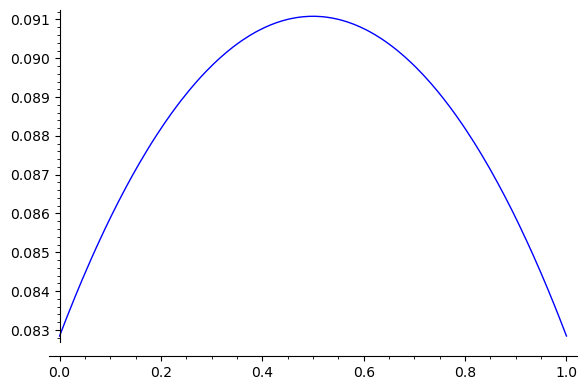

In [23]:
plot(lambda x: angle(.2, .2, x), (0,1))

In [131]:
def get_narrow_points(w, p, d, s1, s2):
    """ :param w: width
        :param p: offset proportion given to surface 1
        :param d: depth as multiplier of width
        :param s1: cutout 1 shift as percentage of width
        :param s2: cutout 2 shift as percentage of width
    """
    o1 = w*p
    o2 = w*(1-p)
    dw = d*w
    return [
        (dw, -s1*w),
        ((o2 + dw + s2*w)/sqrt(2), o1 + (o2 - dw + s2*w)/sqrt(2))
    ]
def dist(pts):
    a = pts[0]
    b = pts[1]
    return sqrt((b[1]-a[1])**2 + (b[0]-a[0])**2)

In [80]:
# find depth multiplier that makes simple cutout insufficient
# to give desired surface area
var("w d")
max_sa = dist(get_narrow_points(w, .5, d, 1, 1))
assume(w > 0, d > 0)
sol = solve(max_sa == w, d)
max_mult = min(n(s.rhs()) for s in sol)
print("max multiplier:", max_mult)

max multiplier: 2.31475737868327


In [86]:
# same, but now constraint on s1/s2
var("w d")
max_sa = dist(get_narrow_points(w, 1, d, 0, 1))
assume(w > 0, d > 0)
sol = solve(max_sa == w, d)
max_mult = min(n(s.rhs()) for s in sol)
print("max multiplier:", max_mult)

max multiplier: 1.10765059749672


In [102]:
# test max multiplier
n(dist(get_narrow_points(.2, 1, 1.107651, 0, 1)))

0.199999938387465

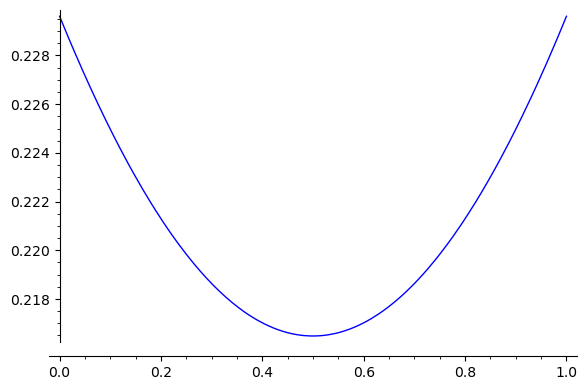

In [11]:
plot(lambda x: dist(get_narrow_points(.2, x, 1, .5, .5)), (0,1))

In [19]:
# solve for t that gives minimal SA >= w
var("w p d t")
g = dist(get_narrow_points(w, p, d/w, (1-p)*t, t))
html(g)
# assume(w > 0, p >= 0, p <= 1, d > w, d < 1.107651*w)
# sol = solve(g == w, t)
# sol

<script type="math/tex">\frac{1}{2} \, \sqrt{{\left(2 \, {\left(p - 1\right)} t w - 2 \, p w + \sqrt{2} {\left({\left(p - 1\right)} w - t w + d\right)}\right)}^{2} + {\left(\sqrt{2} {\left({\left(p - 1\right)} w - t w - d\right)} + 2 \, d\right)}^{2}}</script>

In [150]:
v = sol[0].rhs()
v

1/2*((2*p^2*(sqrt(2) - 2) - 2*p*(sqrt(2) - 2) + sqrt(2))*w - sqrt(2)*d - sqrt(8*d^2*p^2*(2*sqrt(2) - 3) - 8*d^2*p*(2*sqrt(2) - 3) - 2*(2*sqrt(2)*p^2 - 2*sqrt(2)*p - 1)*w^2 + 2*d^2*(2*sqrt(2) - 3) + 4*(4*d*p^2*(sqrt(2) - 1) - 4*d*p*(sqrt(2) - 1) + d*(sqrt(2) - 1))*w))/((p^2*(sqrt(2) - 2) - p*(sqrt(2) - 2) - 1)*w)

In [151]:
html(v)

<script type="math/tex">\frac{{\left(2 \, p^{2} {\left(\sqrt{2} - 2\right)} - 2 \, p {\left(\sqrt{2} - 2\right)} + \sqrt{2}\right)} w - \sqrt{2} d - \sqrt{8 \, d^{2} p^{2} {\left(2 \, \sqrt{2} - 3\right)} - 8 \, d^{2} p {\left(2 \, \sqrt{2} - 3\right)} - 2 \, {\left(2 \, \sqrt{2} p^{2} - 2 \, \sqrt{2} p - 1\right)} w^{2} + 2 \, d^{2} {\left(2 \, \sqrt{2} - 3\right)} + 4 \, {\left(4 \, d p^{2} {\left(\sqrt{2} - 1\right)} - 4 \, d p {\left(\sqrt{2} - 1\right)} + d {\left(\sqrt{2} - 1\right)}\right)} w}}{2 \, {\left(p^{2} {\left(\sqrt{2} - 2\right)} - p {\left(\sqrt{2} - 2\right)} - 1\right)} w}</script>

In [29]:
s2 = sqrt(2)
html(expand((w*(1-p) + d*(1-s2))^2 + (w*(p*(s2-1) + 1) - d)^2 - 2*w^2))

<script type="math/tex">-2 \, \sqrt{2} p^{2} w^{2} + 4 \, p^{2} w^{2} + 2 \, \sqrt{2} p w^{2} - 4 \, p w^{2} - 2 \, \sqrt{2} d^{2} - 2 \, \sqrt{2} d w + 4 \, d^{2}</script>

In [33]:
html(expand((2-sqrt(2))*(p^2-p) + 1))

<script type="math/tex">-\sqrt{2} p^{2} + 2 \, p^{2} + \sqrt{2} p - 2 \, p + 1</script>

In [1]:
def best_shift(width,prop,depth):
    s2 = sqrt(2)
    o1 = s2*width*prop
    o2 = s2*width - o1
    d = s2*depth
    v = s2*o2 - o1
    w = o1
    x = -s2*o1 + o2 + d
    y = -o2 + d*(1-s2)
    a = v^2 + w^2
    b = 2*(v*x + w*y)
    c = x^2 + y^2 - 4*width^2
    sol = (sqrt(b^2 - 4*a*c) - b)/(2*a)
    print(n(a), n(b), n(c))
    return sol
    
def best_shift2(w,p,d):
    s2 = sqrt(2)
    p2p = p^2-p
    c1 = (s2-2)*p2p
    a = (c1-1)*w
    b = s2*d - (2*c1+s2)*w
    s42 = 4*s2
    r = d^2*(4*s2 - 6 + (16*s2 - 24)*p2p) - w^2*(4*s2*p2p - 2) + d*w*(s2 - 1)*(16*p2p + 4)
    return (-b - sqrt(r))/(2*a)

def best_shift3(w,p,d):
    p2p = p^2-p
    a = w*(-1.1715728752538097*p2p - 2)
    b = w*(1.1715728752538097*p2p - 1.4142135623730951) + d*1.4142135623730951
    r = (
        d*d*(-1.3725830020304777*p2p - 0.3431457505076194) +
        w*w*(-5.656854249492381*p2p + 2) +
        d*w*(6.627416997969522*p2p + 1.6568542494923806)
    )
    return (-b - sqrt(r))/a

In [5]:
w = .2
p = 1
dmult = 1
n(best_shift3(w, p, w*dmult))
# G = best_shift(w, p, w*dmult)
# n(G)

0.910179721124455

In [245]:
var("w p d t")
s2 = sqrt(2)
p2p = p^2-p
c1 = (s2-2)*p2p
a = (c1-1)*w
b = s2*d - (2*c1+s2)*w
html(expand(b^2))

<script type="math/tex">-16 \, \sqrt{2} p^{4} w^{2} + 24 \, p^{4} w^{2} + 32 \, \sqrt{2} p^{3} w^{2} - 48 \, p^{3} w^{2} + 8 \, \sqrt{2} d p^{2} w - 24 \, \sqrt{2} p^{2} w^{2} - 8 \, d p^{2} w + 32 \, p^{2} w^{2} - 8 \, \sqrt{2} d p w + 8 \, \sqrt{2} p w^{2} + 8 \, d p w - 8 \, p w^{2} + 2 \, d^{2} - 4 \, d w + 2 \, w^{2}</script>

In [246]:
html(expand(d^2*(4*s2 - 6 + (16*s2 - 24)*p2p) - w^2*(4*s2*p2p - 2) + d*w*(s2 - 1)*(16*p2p + 4)))

<script type="math/tex">16 \, \sqrt{2} d^{2} p^{2} + 16 \, \sqrt{2} d p^{2} w - 4 \, \sqrt{2} p^{2} w^{2} - 24 \, d^{2} p^{2} - 16 \, d p^{2} w - 16 \, \sqrt{2} d^{2} p - 16 \, \sqrt{2} d p w + 4 \, \sqrt{2} p w^{2} + 24 \, d^{2} p + 16 \, d p w + 4 \, \sqrt{2} d^{2} + 4 \, \sqrt{2} d w - 6 \, d^{2} - 4 \, d w + 2 \, w^{2}</script>

In [108]:
n(dist(get_narrow_points(w, p, dmult, s*(1-p), s*p)))

0.200000000000000

In [168]:
var("w p d t")
g = dist(get_narrow_points(w, p, d/w, t*(1-p), t*p))
#sol = solve(g == w, t)
html(g)

<script type="math/tex">\frac{1}{2} \, \sqrt{{\left(2 \, {\left(p - 1\right)} t w - 2 \, p w - \sqrt{2} {\left(p t w - {\left(p - 1\right)} w - d\right)}\right)}^{2} + {\left(\sqrt{2} {\left(p t w - {\left(p - 1\right)} w + d\right)} - 2 \, d\right)}^{2}}</script>

In [143]:
h = sol[0].rhs()
html(h)

<script type="math/tex">\frac{{\left(2 \, p^{2} {\left(\sqrt{2} - 2\right)} - 2 \, p {\left(\sqrt{2} - 2\right)} + \sqrt{2}\right)} w - \sqrt{2} d - \sqrt{8 \, d^{2} p^{2} {\left(2 \, \sqrt{2} - 3\right)} - 8 \, d^{2} p {\left(2 \, \sqrt{2} - 3\right)} - 2 \, {\left(2 \, \sqrt{2} p^{2} - 2 \, \sqrt{2} p - 1\right)} w^{2} + 2 \, d^{2} {\left(2 \, \sqrt{2} - 3\right)} + 4 \, {\left(4 \, d p^{2} {\left(\sqrt{2} - 1\right)} - 4 \, d p {\left(\sqrt{2} - 1\right)} + d {\left(\sqrt{2} - 1\right)}\right)} w}}{2 \, {\left(p^{2} {\left(\sqrt{2} - 2\right)} - p {\left(\sqrt{2} - 2\right)} - 1\right)} w}</script>

In [152]:
var("w p d t")
g = 8*d^2*p^2*(2*sqrt(2) - 3) - 8*d^2*p*(2*sqrt(2) - 3) - 2*(2*sqrt(2)*p^2 - 2*sqrt(2)*p - 1)*w^2 + 2*d^2*(2*sqrt(2) - 3) + 4*(4*d*p^2*(sqrt(2) - 1) - 4*d*p*(sqrt(2) - 1) + d*(sqrt(2) - 1))*w
a = ((sqrt(2)-2)*(p^2-p)-1)*w
b = sqrt(2)*d - (2*(sqrt(2)-2)*(p^2-p)+sqrt(2))*w

g.simplify_full()

8*d^2*p^2*(2*sqrt(2) - 3) - 8*d^2*p*(2*sqrt(2) - 3) - 2*(2*sqrt(2)*p^2 - 2*sqrt(2)*p - 1)*w^2 + 2*d^2*(2*sqrt(2) - 3) + 4*(4*d*p^2*(sqrt(2) - 1) - 4*d*p*(sqrt(2) - 1) + d*(sqrt(2) - 1))*w

In [153]:
v

1/2*((2*p^2*(sqrt(2) - 2) - 2*p*(sqrt(2) - 2) + sqrt(2))*w - sqrt(2)*d - sqrt(8*d^2*p^2*(2*sqrt(2) - 3) - 8*d^2*p*(2*sqrt(2) - 3) - 2*(2*sqrt(2)*p^2 - 2*sqrt(2)*p - 1)*w^2 + 2*d^2*(2*sqrt(2) - 3) + 4*(4*d*p^2*(sqrt(2) - 1) - 4*d*p*(sqrt(2) - 1) + d*(sqrt(2) - 1))*w))/((p^2*(sqrt(2) - 2) - p*(sqrt(2) - 2) - 1)*w)

In [165]:
h = (g-b^2).expand()

In [166]:
html(h)

<script type="math/tex">16 \, \sqrt{2} p^{4} w^{2} - 24 \, p^{4} w^{2} - 32 \, \sqrt{2} p^{3} w^{2} + 48 \, p^{3} w^{2} + 16 \, \sqrt{2} d^{2} p^{2} + 8 \, \sqrt{2} d p^{2} w + 20 \, \sqrt{2} p^{2} w^{2} - 24 \, d^{2} p^{2} - 8 \, d p^{2} w - 32 \, p^{2} w^{2} - 16 \, \sqrt{2} d^{2} p - 8 \, \sqrt{2} d p w - 4 \, \sqrt{2} p w^{2} + 24 \, d^{2} p + 8 \, d p w + 8 \, p w^{2} + 4 \, \sqrt{2} d^{2} + 4 \, \sqrt{2} d w - 8 \, d^{2}</script>

In [24]:
# New formulation
var("w p t")
p1 = (0, -(1-p)*t)
p2 = (((1-p)*w + p*t)/sqrt(2), p*w + ((1-p)*w + p*t)/sqrt(2))
g = dist([p1,p2])
assume(w>0,p>=0,p<=1)
sol = solve(w == g, t)
html(sol[0].rhs())
sol[0].rhs()

1/2*((2*p^2*(sqrt(2) - 2) - 2*p*(sqrt(2) - 2) + sqrt(2))*w - sqrt(-4*sqrt(2)*p^2 + 4*sqrt(2)*p + 2)*w)/(p^2*(sqrt(2) - 2) - p*(sqrt(2) - 2) - 1)

In [63]:
def inner_shift(w, p):
    p2p = p*p-p
    c = 1.17157287525381*p2p
    return w*(c + sqrt(-5.65685424949238*p2p + 2) - 1.41421356237310)/(c + 2)

In [68]:
# verify it works
w = .2
p = 3
t = inner_shift(w, p)
print(n(t))
p1 = (0, -(1-p)*t)
p2 = (((1-p)*w + p*t)/sqrt(2), p*w + ((1-p)*w + p*t)/sqrt(2))
n(dist([p1,p2]))

0.124375939114095 + 0.125182730136549*I


0.200000000000000 - 2.51534904016637e-16*I

In [6]:
# With arbitrary angle
var("w p t c s")
p1 = (0, -(1-p)*t)
p2 = (((1-p)*w + p*t)*c, p*w + ((1-p)*w + p*t)*s)
g = dist([p1,p2])
assume(w>0,p>=0,p<=1,a>=0)
sol = solve(w == g, t)
html(sol[0].rhs())
sol[0].rhs()

(((c^2 + 1)*p^2 + (p^2 - p)*s^2 - (c^2 + 1)*p - (2*p^2 - 2*p + 1)*s)*w - sqrt(p^2*s^2 - (3*c^2 - 1)*p^2 - c^2 + 2*(2*c^2 - 1)*p - 2*(p^2 - p)*s + 1)*w)/(p^2*s^2 + (c^2 + 1)*p^2 - 2*(p^2 - p)*s - 2*p + 1)

In [7]:
html(sol[0].rhs())

<script type="math/tex">\frac{{\left({\left(c^{2} + 1\right)} p^{2} + {\left(p^{2} - p\right)} s^{2} - {\left(c^{2} + 1\right)} p - {\left(2 \, p^{2} - 2 \, p + 1\right)} s\right)} w - \sqrt{p^{2} s^{2} - {\left(3 \, c^{2} - 1\right)} p^{2} - c^{2} + 2 \, {\left(2 \, c^{2} - 1\right)} p - 2 \, {\left(p^{2} - p\right)} s + 1} w}{p^{2} s^{2} + {\left(c^{2} + 1\right)} p^{2} - 2 \, {\left(p^{2} - p\right)} s - 2 \, p + 1}</script>

In [38]:
# verify it works
def inner_shift(w, p, angle):
    c = cos(angle)
    s = sin(angle)
    p2 = p*p
    c2 = c*c
    c21 = c2 + 1
    s2s = s*s - 2*s
    c2s = s2s+c21
    s2 = 2*s-2
    p2p = p2 - p
    return w*(p2p*c2s - s + sqrt((s2s - 3*c2 + 1)*p2 + (4*c2 + s2)*p - c2 + 1))/(p2*c2s + p*s2 + 1)
w = .2
p = .5
t = inner_shift(w, p, 45*pi/180)
print(n(t))
p1 = (0, -(1-p)*t)
p2 = (((1-p)*w + p*t)/sqrt(2), p*w + ((1-p)*w + p*t)/sqrt(2))
n(dist([p1,p2]))

0.0164784400584788


0.200000000000000

In [136]:
# border between two checkerboards
var("b d c s t")
# c = cos(edge), s = sin(edge), t = tan(border)
x = b+d*t
pts = [
    (d, -x),
    (d*c + x*s, -d*s + x*c)
]
assume(b>0,d>0)
sol = solve(2*b == dist(pts), t)

In [138]:
sol[0].rhs()

-(b*c^2 + b*s^2 + 2*b*c - 2*d*s + b + sqrt(-d^2*s^4 + 4*b^2*c^2 + 8*b^2*c - (c^4 - 2*c^2 + 1)*d^2 - 2*((c^2 - 1)*d^2 - 2*b^2)*s^2 + 4*b^2))/(d*s^2 + (c^2 + 2*c + 1)*d)

In [140]:
html(expand(sol[0]))

<script type="math/tex">t = -\frac{b c^{2}}{c^{2} d + d s^{2} + 2 \, c d + d} - \frac{b s^{2}}{c^{2} d + d s^{2} + 2 \, c d + d} - \frac{2 \, b c}{c^{2} d + d s^{2} + 2 \, c d + d} + \frac{2 \, d s}{c^{2} d + d s^{2} + 2 \, c d + d} - \frac{b}{c^{2} d + d s^{2} + 2 \, c d + d} - \frac{\sqrt{-c^{4} d^{2} - 2 \, c^{2} d^{2} s^{2} - d^{2} s^{4} + 4 \, b^{2} c^{2} + 2 \, c^{2} d^{2} + 4 \, b^{2} s^{2} + 2 \, d^{2} s^{2} + 8 \, b^{2} c + 4 \, b^{2} - d^{2}}}{c^{2} d + d s^{2} + 2 \, c d + d}</script>

In [195]:
def border_angle(b, d, angle):
    #angle *= math.pi/180
    c = cos(angle)
    s = sin(angle)
    c2 = c*c
    s2 = s*s
    x = c2+s2+2*c+1
    radical = -d*d*(c2*(c2-2) + s2*(s2-2) + 2*c2*s2 + 1) + 4*b^2*x
    t = (-b*x + 2*d*s + sqrt(radical))/(d*x)
    return atan(t)
def border_dist(b, d, theta_e, theta_b):
    x = b+d*tan(theta_b)
    c = cos(theta_e)
    s = sin(theta_e)
    pts = [
        (d, -x),
        (d*c + x*s, -d*s + x*c)
    ]
    return dist(pts)

In [196]:
x = .1
y = 0.2215302
a = 45*pi/180
angle = border_angle(x, y, a)
print(n(angle*180/pi))

24.2946960052269


In [172]:
expand(-d^2*s^4 + 4*b^2*c^2 + 8*b^2*c - (c^4 - 2*c^2 + 1)*d^2 - 2*((c^2 - 1)*d^2 - 2*b^2)*s^2 + 4*b^2)

-c^4*d^2 - 2*c^2*d^2*s^2 - d^2*s^4 + 4*b^2*c^2 + 2*c^2*d^2 + 4*b^2*s^2 + 2*d^2*s^2 + 8*b^2*c + 4*b^2 - d^2

In [132]:
n(border_dist(.1, 0, 45/180*pi, 0))

0.184775906502257

In [133]:
n(sqrt((.1/sqrt(2))^2+(.1+.1/sqrt(2))^2))

0.184775906502257